<a href="https://colab.research.google.com/github/JemDeGuzman/Computer-Vision-Crash-Course/blob/main/Activity%206/De_Guzman_Activity_6_Face_Detection_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Face Detection using OpenCV**
**Name** | De Guzman, Jemuel Endrew C.
**Section** | CPE32S3
**Date Performed**: | 2-21-2025
**Date Submitted**: | 2-21-2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

In [27]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2
from google.colab.patches import cv2_imshow

picPath = '/content/breaking_bad.jpg'
haarPath = '/content/haarcascade_frontalface_default.xml'

def faceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 2)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

  cv2_imshow(img)

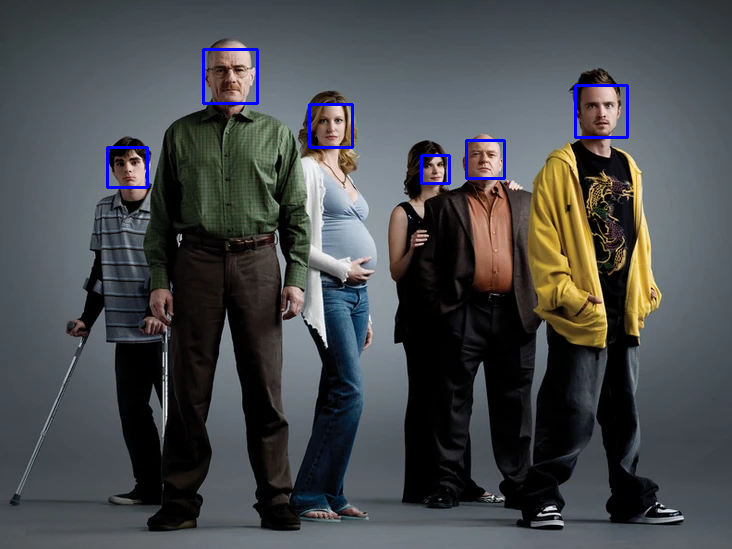

In [28]:
faceDetect(picPath)

**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?
- Provide an analysis of the parameters of the `detectMultiScale` method.
- Change the color of the border of the detected faces to red.
- Are you able to make the borders thicker? Demonstrate.

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [3]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [7]:
def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [ ]:
  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [ ]:
  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [ ]:
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [ ]:

      cv2.imshow("camera", frame)
      if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
        break

    camera.release()
    cv2.destroyAllWindows()

  if __name__ == "__main__":
  detect()

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

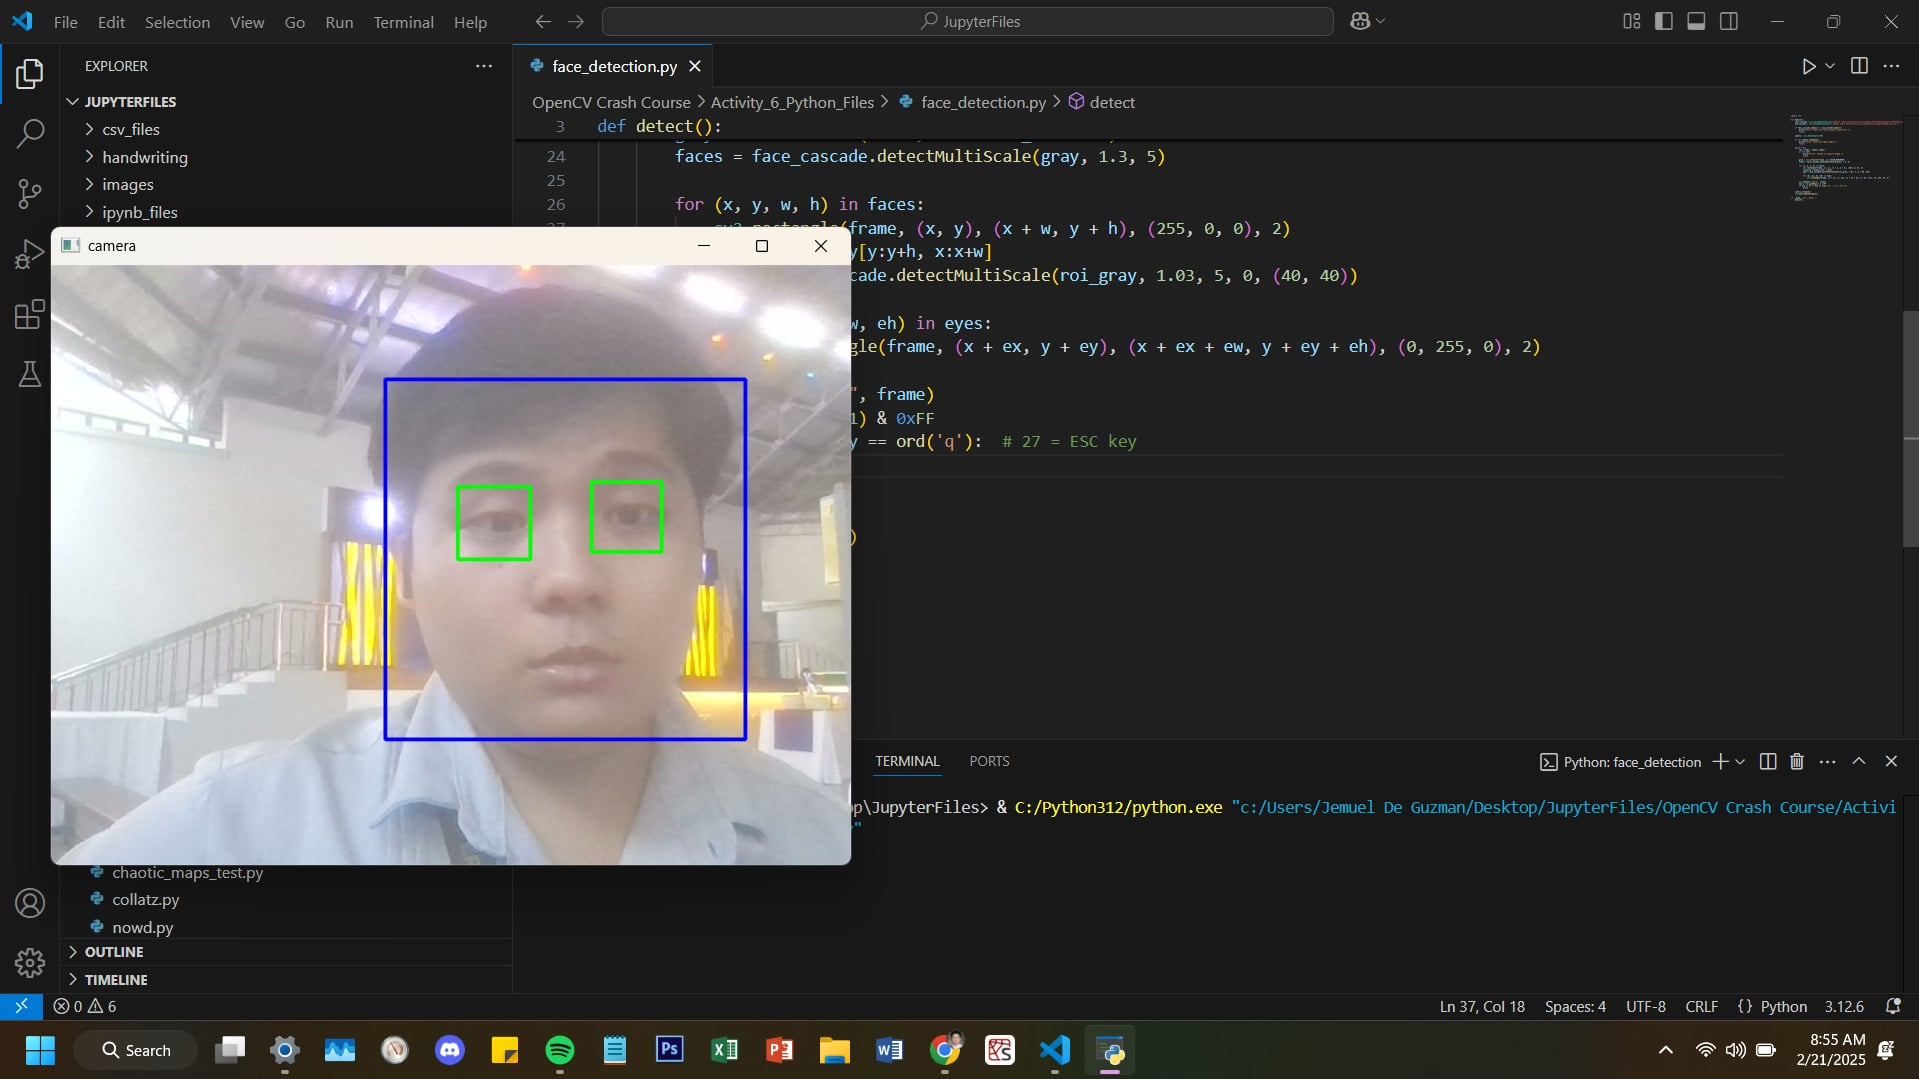

In [29]:
# Screenshot of the output for the working code
ss = cv2.imread('/content/procedure_output.jpg')
cv2_imshow(ss)

### <u>Summary of Steps done in the detect() method</u>

- Load up Haar cascade xml files
- Initialize Camera for frame capturing
- Start Capturing Frames using the loop
- Convert Current Frame to Grayscale
- Draw a Blue Rectangle for each detected face
- Draw a Green Rectangle for each detected eye in each detected face
- Display the resulting frame with the drawn shapes
- Close the camera and the window

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

In [1]:
# Face, Eye and Smile Detection Code
import cv2

def detect():
    face_cascade = cv2.CascadeClassifier(r'OpenCV Crash Course/Activity_6_Python_Files/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(r'OpenCV Crash Course/Activity_6_Python_Files/haarcascade_eye.xml')
    smile_cascade = cv2.CascadeClassifier(r'OpenCV Crash Course/Activity_6_Python_Files/haarcascade_smile.xml')

    camera = cv2.VideoCapture(0)
    if not camera.isOpened():
        print("Error: Could not open camera.")
        return

    while True:
        ret, frame = camera.read()
        if not ret:
            print("Error: Failed to capture image.")
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box for face
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            try:
                eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
                for (ex, ey, ew, eh) in eyes:
                    cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # Green box for eyes
            except cv2.error:
                pass

            try:
                smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=20, minSize=(25, 25))
                for (sx, sy, sw, sh) in smiles:
                    cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)  # Red box for smile
            except cv2.error:
                pass

        cv2.imshow("Face, Eye & Smile Detection", frame)

        # Press 'q' or 'ESC' to exit
        key = cv2.waitKey(1) & 0xFF
        if key == 27 or key == ord('q'):  # 27 = ESC key
            break

    # Cleanup
    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()


Error: Could not open camera.


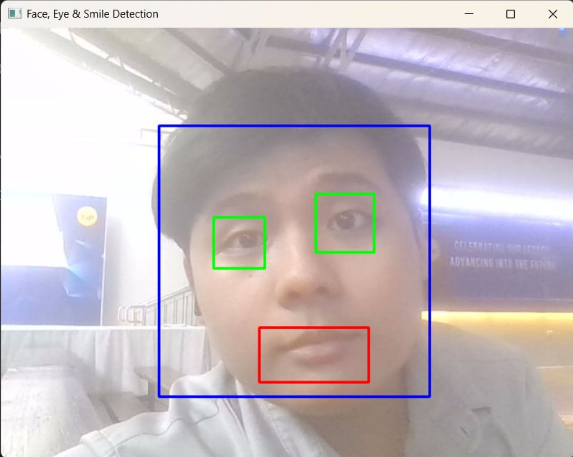

In [2]:
import cv2
from google.colab.patches import cv2_imshow

s_ss = cv2.imread('/content/supplementary_output.jpg')
cv2_imshow(s_ss)

## 5. Summary, Conclusions and Lessons Learned

**From the activity, I learned how to apply the previous activities as well as applying a pre-existing facial detection model using OpenCV. By using the Haar Cascade detection, I am able to easily detect faces as well as facial features on each face detected using a live feed from my camera. While it still acts a bit buggy and doesn't consistently or easily detect the faces as well as the features, it still does a great job at doing so even though I did not configure it much. This can be applied for Facial recognition in combination with machine learning. Not only will it detect faces, but it will also detect whose face it is.**

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*